In [2]:
import os
import sys  
import rasterio

from rasterio.plot import show

import numpy as np

#from PIL import Image

import numpy as np

import matplotlib.pyplot as plt

from geneticalgorithm import geneticalgorithm as ga

root = os.getcwd() + "/.."

sys.path.insert(0, root)
import src.camera_allocation_functions as aptitude



In [3]:

fp1 = '../data/processed/aguascalientes/00_clossenes_to_streets_normalized_ags'
walls = rasterio.open(fp1)

fp2 = '../data/processed/aguascalientes/01_densidad_delitos_sobre_calle_1998'
crime_density = rasterio.open(fp2)

fp3 = '../data/processed/aguascalientes/02_manzanas_raster_binary'
blocks = rasterio.open(fp3)

#correction
S = blocks.read(1)
S[S==255] = 0

CD = crime_density.read(1)

W = walls.read(1)

Text(0.5, 0.98, 'Required Maps')

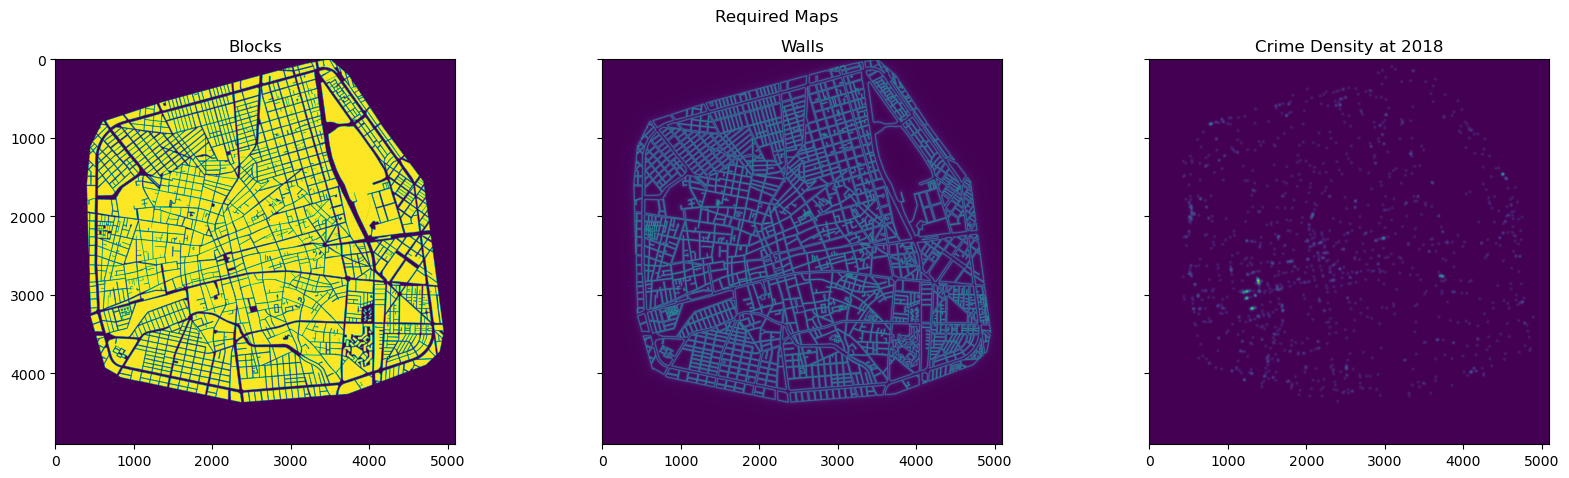

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axs[0].imshow(S)
axs[0].set_title("Blocks")
axs[1].imshow(W)
axs[1].set_title("Walls")
axs[2].imshow(CD)
axs[2].set_title("Crime Density at 2018")
fig.suptitle('Required Maps')


In [6]:
np.sum(S==0)/(np.sum(S==1)+np.sum(S!=1))

0.5146466147595599

In [7]:
# we set the parameter of the cover region of the surveillance camera (SC) that is (L*2+1)^2
L = 50

#we test the point 
si = (2836, 1394)

Text(0.5, 1.0, 'Isovist')

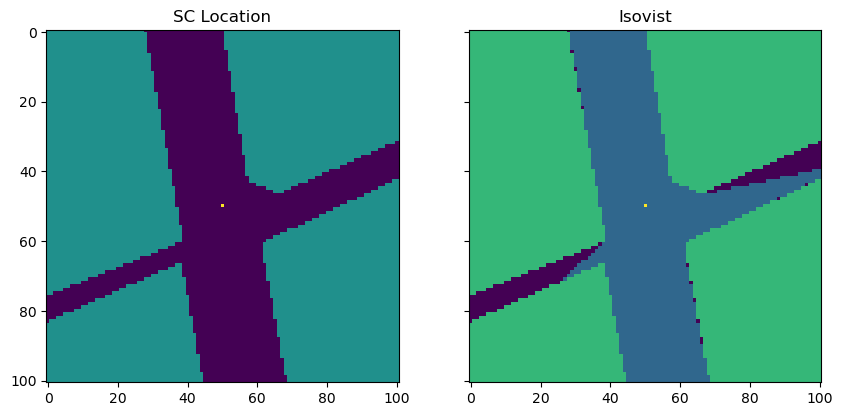

In [8]:
Sc = np.copy(S)
Sc[si] =  S[si]

RSC = np.copy(Sc[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
RSCc = np.copy(RSC)

Z = np.zeros(np.shape(RSC))
Z[(L, L)] = 2

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axs[0].imshow(RSC+Z)
axs[0].set_title("SC Location")
axs[1].imshow(aptitude.isovista(RSCc)+RSCc*2+Z)
axs[1].set_title("Isovist")

Text(0.5, 1.0, '2654.0')

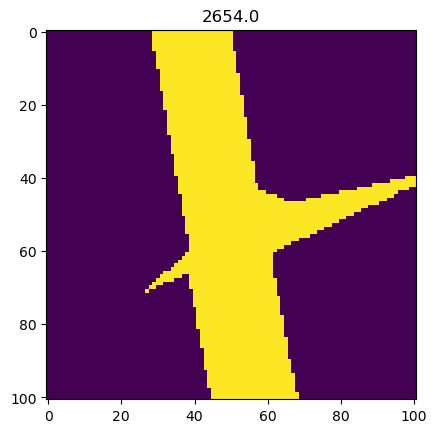

In [10]:
iv = aptitude.isovista(RSCc)
plt.imshow(iv)
plt.title(np.sum(iv))

In [11]:
aptitude.isovista(RSCc).shape

(101, 101)

In [12]:
from timeit import default_timer as timer

T =list([])

K = aptitude.gkern(L*2 + 1, 2)

for i in range(1000):
    

    start = timer()

    i = L
    j = L

    si = (i, j)
    
    S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])

    #es la operacion mas costosa
    mask = aptitude.isovista(S_sub)


    p = np.sum(CD_sub*K*mask)

    end = timer()

    #print((end - start))
    T.append((end - start))

In [13]:
sm = np.sum(1*(S==0)*(CD>0))

In [14]:
size = CD.shape[0]*CD.shape[1]

In [24]:
Total = np.sum(S==0)

In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(data = {"visibility coefficient": [0], "area": [0],"i": [0], "j": [0]})


p = 100
a = 200
i = 90
j = 80
newData = pd.DataFrame({"visibility coefficient": [p], "area": [a],"i": [i], "j": [j]})

df = pd.concat([df, newData], ignore_index=True)

In [18]:
newData = pd.DataFrame({"visibility coefficient": [p], "area": [a],"i": [i], "j": [j]})

df = pd.concat([df, newData], ignore_index=True)

In [19]:
df

visibility coefficient  area   i   j
0                       0     0   0   0
1                     100   200  90  80
2                     100   200  90  80

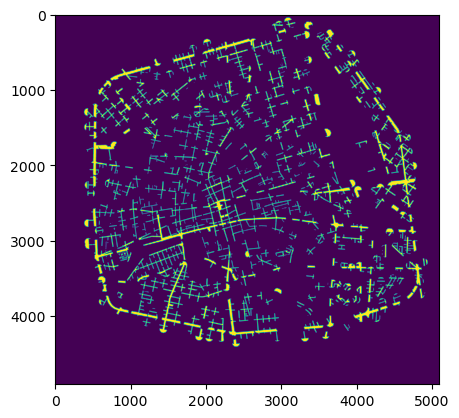

In [43]:
plt.imshow((CD>0) & (S==0))
Total = np.sum((CD>0) & (S==0))

Text(0.5, 1.0, '12856472')

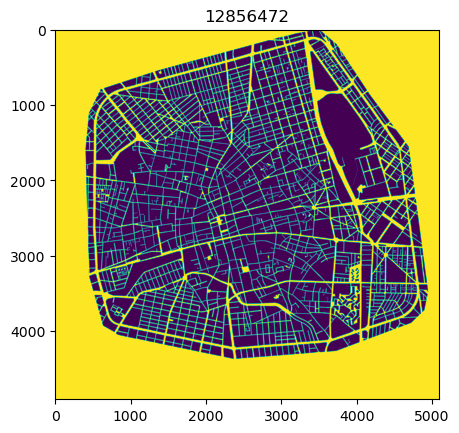

In [36]:
plt.imshow((S==0))
plt.title(np.sum(S==0))

In [47]:
total = len(range(L, S.shape[0]-L))*len(range(L, S.shape[1]-L))

Text(0.5, 1.0, 'True')

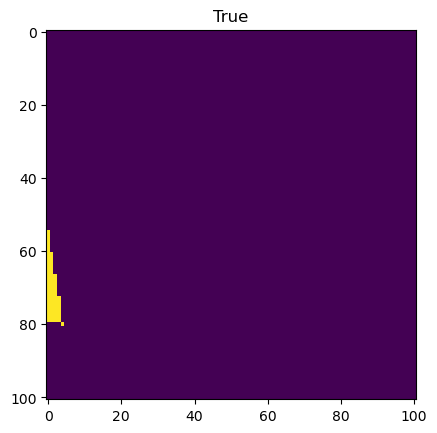

In [56]:


plt.imshow(CD_sub*S_sub>0)
plt.title(np.sum(CD_sub*S_sub>0)>0)

Text(0.5, 1.0, 'True')

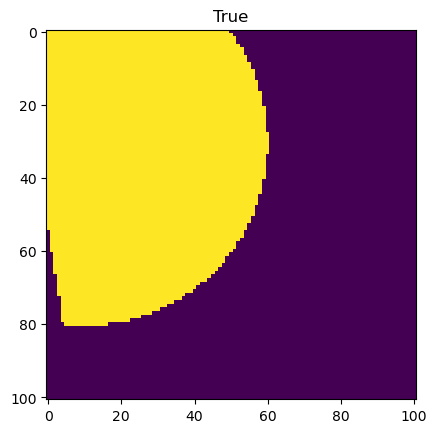

In [67]:
plt.imshow((S_sub==0)*CD_sub>0)
plt.title(np.sum((S_sub==0)*CD_sub>0)>0)

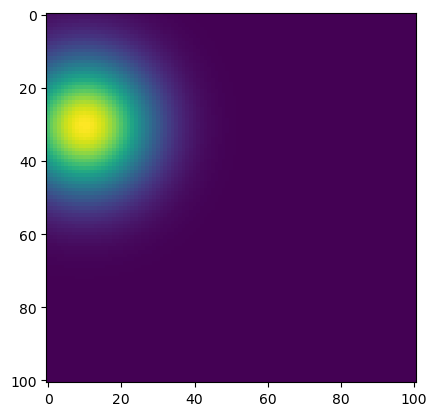

In [59]:
plt.imshow(CD_sub)

In [68]:
df = pd.DataFrame(data = {"visibility coefficient": [0], "area": [0],"i": [0], "j": [0]})

m = 0
c = 0

K = aptitude.gkern(L*2 + 1, 2)

for i in range(L, S.shape[0]-L):
    for j in range(L, S.shape[1]-L):
        
        si = (i, j)
        
        S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
        
        CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
        
        #if si is street, and the street in region CD_sub has some density crime then, compute isovista:
        visibleCrime = np.sum((S_sub==0)*(CD_sub>0))>0
        if S[si]==0 and visibleCrime:
            
            isovist = aptitude.isovista(S_sub)
            
            area = np.sum(isovist)
        
            p = np.sum(CD_sub*K*isovist)
            
            #agregar a dataframe lista con y,j,p
            newData = pd.DataFrame({"visibility coefficient": [p], "area": [area], "i": [i], "j": [j]})
            
            df = pd.concat([df, newData], ignore_index=True)
                    
        c = c +1
        
        if c%100000==0:
            s = "{progress:.2f}%".format(progress = (c/total)*100)
            print(s)
        
            
            
            
            

0.42%
0.83%
1.25%
1.67%
2.08%
2.50%
2.92%
3.33%
3.75%
4.17%
4.58%
5.00%
5.42%
5.84%
6.25%
6.67%
7.09%
7.50%
7.92%
8.34%
8.75%
9.17%
9.59%
10.00%
10.42%
10.84%
11.25%
11.67%
12.09%
12.50%
12.92%
13.34%
13.75%
14.17%
14.59%
15.01%
15.42%
15.84%
16.26%
16.67%
17.09%
17.51%
17.92%
18.34%
18.76%
19.17%
19.59%
20.01%
20.42%
20.84%
21.26%
21.67%
22.09%
22.51%
22.92%
23.34%
23.76%
24.18%
24.59%
25.01%
25.43%
25.84%
26.26%
26.68%
27.09%
27.51%
27.93%
28.34%
28.76%
29.18%
29.59%
30.01%
30.43%
30.84%
31.26%
31.68%
32.09%
32.51%
32.93%
33.35%
33.76%
34.18%
34.60%
35.01%
35.43%
35.85%
36.26%
36.68%
37.10%
37.51%
37.93%
38.35%
38.76%
39.18%
39.60%
40.01%
40.43%
40.85%
41.26%
41.68%
42.10%
42.52%
42.93%
43.35%
43.77%
44.18%
44.60%
45.02%
45.43%
45.85%
46.27%
46.68%
47.10%
47.52%
47.93%
48.35%
48.77%
49.18%
49.60%
50.02%
50.43%
50.85%
51.27%
51.69%
52.10%
52.52%
52.94%
53.35%
53.77%
54.19%
54.60%
55.02%
55.44%
55.85%
56.27%
56.69%
57.10%
57.52%
57.94%
58.35%
58.77%
59.19%
59.60%
60.02%
60.44%
60.86%
6

In [70]:
df.to_csv("fitness_positions_vc_area.csv")

In [71]:
DF = pd.read_csv("fitness_positions_vc_area.csv")

In [73]:
DF_sort = DF.sort_values(by = ['visibility coefficient'], ascending = False)

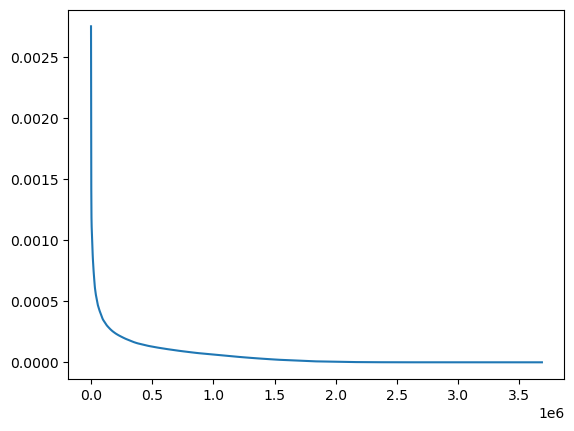

In [74]:
plt.plot(np.array(DF_sort[:]['visibility coefficient']))

In [80]:
A = (np.array(DF_sort[0:1]["i"])-np.array(DF_sort[:]["i"]))**2

In [81]:
B = (np.array(DF_sort[0:1]["j"])-np.array(DF_sort[:]["j"]))**2

In [82]:
N = (A+B)**(0.5)<50

In [83]:
np.sum(N)

2864

In [84]:
DF_sort

Unnamed: 0  visibility coefficient    area     i     j
2235820     2235820                0.002754  2654.0  2836  1394
2236733     2236733                0.002754  2701.0  2837  1394
2234959     2234959                0.002753  2612.0  2835  1394
2236734     2236734                0.002753  2728.0  2837  1395
2237686     2237686                0.002753  2753.0  2838  1394
...             ...                     ...     ...   ...   ...
3449911     3449911                0.000000   958.0  4118  2968
3449910     3449910                0.000000   937.0  4118  2967
3449909     3449909                0.000000   909.0  4118  2966
3449908     3449908                0.000000   901.0  4118  2965
0                 0                0.000000     0.0     0     0

[3685295 rows x 5 columns]

In [137]:
DF_sort

Unnamed: 0             f     i     j
1063599     1063599  2.754023e-03  2836  1394
1064110     1064110  2.753733e-03  2837  1394
1063088     1063088  2.753293e-03  2835  1394
1064111     1064111  2.753039e-03  2837  1395
1064621     1064621  2.752662e-03  2838  1394
...             ...           ...   ...   ...
577821       577821  9.722918e-11  1821  2821
892237       892237  9.549662e-11  2524  2394
676380       676380  9.545438e-11  2081  4149
387385       387385  9.370800e-11  1322  2271
0                 0  0.000000e+00     0     0

[1777256 rows x 4 columns]

In [85]:
DF_sort_2 = df_sort[N==False]

NameError: name 'df_sort' is not defined

In [138]:
DF_sort_3 = DF_sort_2.sort_values(by = ['f'], ascending = False)

In [141]:
DF_sort_2[0:1]

f     i     j
1025474  0.001509  2771  3721

In [139]:
DF_sort_3

f     i     j
1025474  1.509316e-03  2771  3721
1026500  1.507523e-03  2773  3721
1025990  1.506299e-03  2772  3720
1025992  1.506037e-03  2772  3722
1024946  1.505849e-03  2770  3720
...               ...   ...   ...
577821   9.722918e-11  1821  2821
892237   9.549662e-11  2524  2394
676380   9.545438e-11  2081  4149
387385   9.370800e-11  1322  2271
0        0.000000e+00     0     0

[1774392 rows x 3 columns]

In [88]:
si = (2836, 1394)

CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])

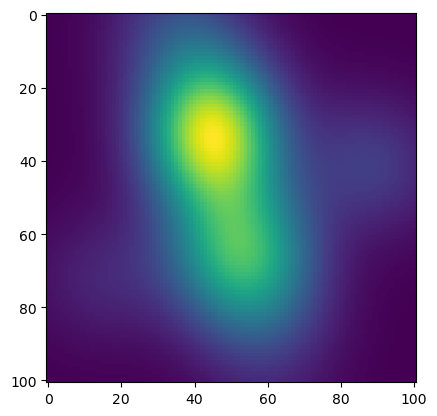

In [89]:
plt.imshow(CD_sub)

In [64]:
def F(X, S=S, Walls=W, CD=CD):
    
    return aptitude.F(X, S, Walls, CD)

In [91]:
#testing F

# num of cameras

n_cameras = 10

varbound = np.array([[L, S.shape[0]-L-1], [L, S.shape[1]-L-1]]*n_cameras)

X = np.array([np.random.randint(p[0], p[1]) for p in varbound])

In [92]:
X_resh = X.reshape(-1, 2)

In [93]:
X_resh = [[2836, 1394]]
n_cameras = 1

checar coordenada: (447, 249)

(2836, 1394)


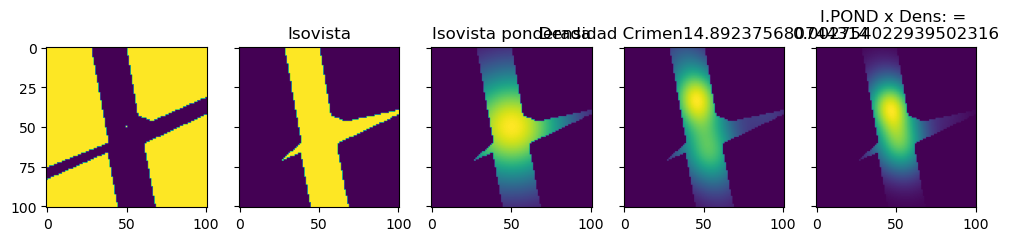

In [95]:
COVERS = np.zeros((n_cameras+1, S.shape[0], S.shape[1]))

for i, x in enumerate(X_resh):
    
    si = tuple(x)
    print(si)
    
    Z = np.zeros((101, 101))
    Z[(L, L)] = 1
    
    S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
    mask = aptitude.isovista(S_sub)
    K = aptitude.gkern(L*2 + 1, 2)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)
    axs[0].imshow(S_sub+Z)
    axs[1].imshow(mask)
    axs[1].title.set_text("Isovista")
    axs[2].imshow(mask*K)
    axs[2].title.set_text("Isovista ponderada")
    axs[3].imshow(CD_sub*mask)
    axs[3].title.set_text("Densidad Crimen" + str(np.sum(CD_sub*mask)))
    axs[4].imshow(CD_sub*K*mask)
    axs[4].title.set_text("I.POND x Dens: = \n"+str(np.sum(CD_sub*K*mask)))
    
    COVERS[i+1, si[0]-L : si[0] + L + 1, si[1]-L:si[1]+L+1] = CD_sub*K*mask

    plt.show()
    
max_covers = np.max(COVERS, axis=0)
    
   

    
    
    

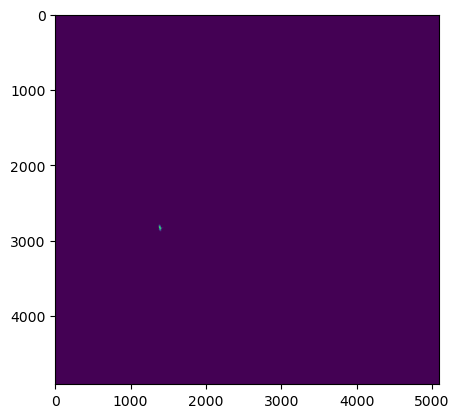

In [96]:
plt.imshow(max_covers)

In [151]:
np.mean(T)*S.shape[0]*S.shape[1]/60/60

23.205142120352388

In [106]:
m = 0

c = 0
for i in range(L, (S.shape[1])):
    for j in range(L, (S.shape[0])):
        

        
        si = (i, j)
        S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
        CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
        mask = aptitude.isovista(S_sub)
        K = aptitude.gkern(L*2 + 1, 2)
        
        
        p = np.sum(CD_sub*K*mask)
        if m > p:
            m = p
            x_max = j
            y_max = i
            
        if (c%1000)==0:
            print("pix:", c)
        c+=1
        
  
   
            
            
        

pix: 0
pix: 1000
pix: 2000
pix: 3000
pix: 4000
pix: 5000


KeyboardInterrupt: 

NameError: name 'COVERS' is not defined

In [ ]:
si = (2836, 1394)

Text(0.5, 1.0, '0.0027540229395023154')

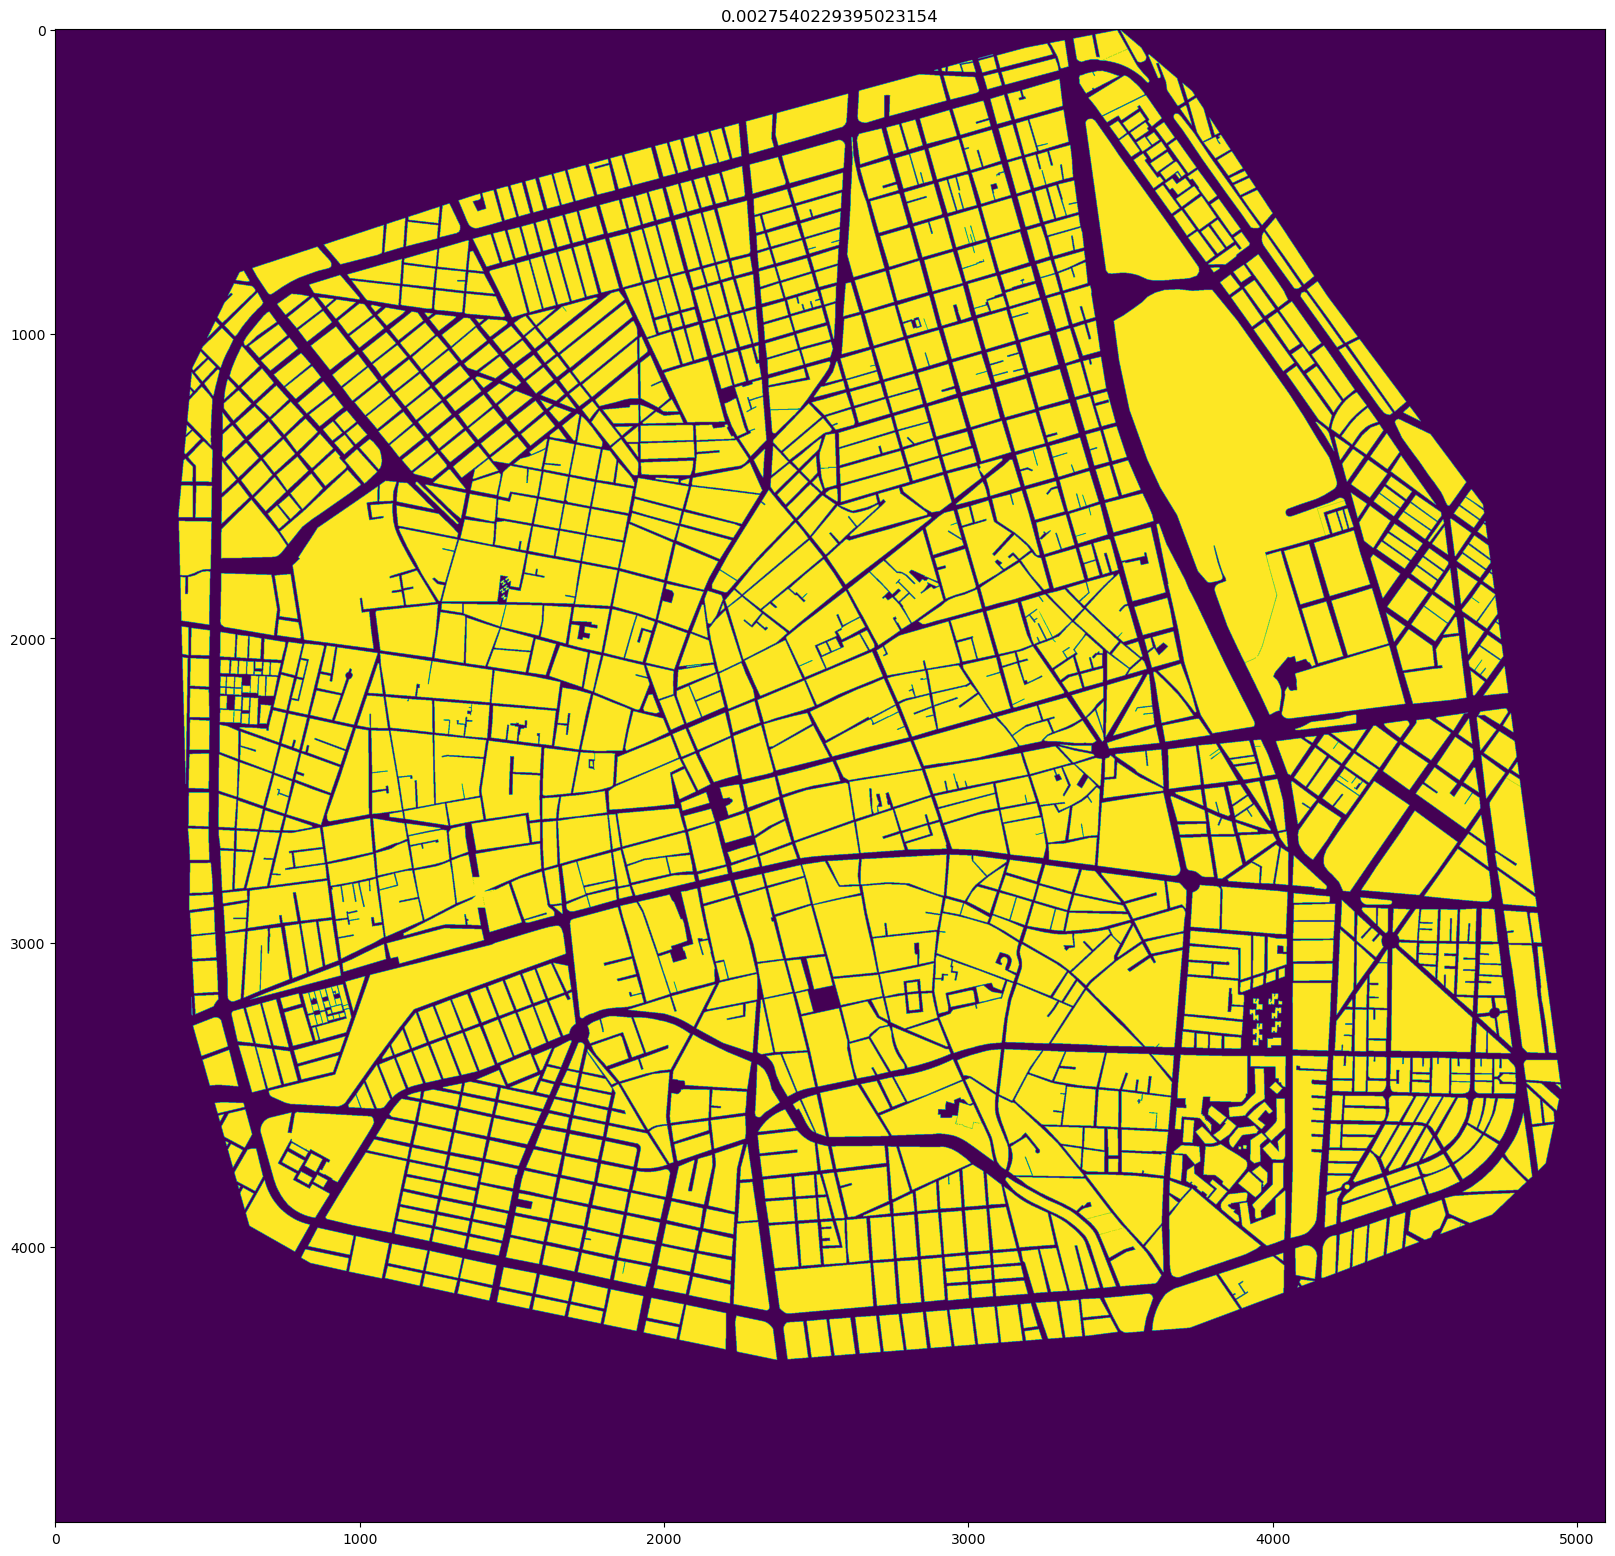

In [97]:
plt.figure(figsize=(20, 20))
arg_max_covers = np.argmax(COVERS, axis=0)
max_covers = np.max(COVERS, axis=0)
plt.imshow(arg_max_covers+S*1)
plt.title(np.sum(max_covers))

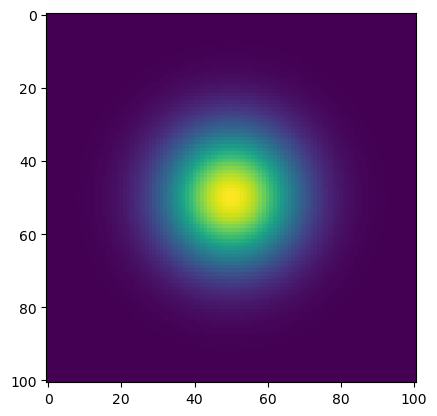

In [98]:
plt.imshow(aptitude.gkern(L*2+1, 4))

In [99]:
n_sensors = 10
varbound = np.array([[L, S.shape[0]-L-1], [L, S.shape[1]-L-1]]*n_sensors)
dim = len(varbound)

In [152]:
algorithm_parameters = {"max_num_iteration": 20, 
                        "population_size": 30, 
                        "mutation_probability": 0.01, 
                        "elit_ratio": 0.1, 
                        "crossover_probability": 0.5, 
                        "parents_portion": 0.3, 
                        "crossover_type": 
                        "uniform", 
                        "max_iteration_without_improv": 20}

In [153]:
model = ga(function = F,
             dimension = dim,
             algorithm_parameters = algorithm_parameters,
             variable_type = 'int',
             variable_boundaries = varbound,
             convergence_curve = True)

 The best solution found:                                                                           
 [2726. 2511. 2246. 3145. 4043. 1465. 3978. 4116. 2063. 2534. 2836. 4151.
 1147. 1277. 3977. 1128. 2269. 3725. 3360. 4575.]

 Objective function:
 -0.0031769331911211413


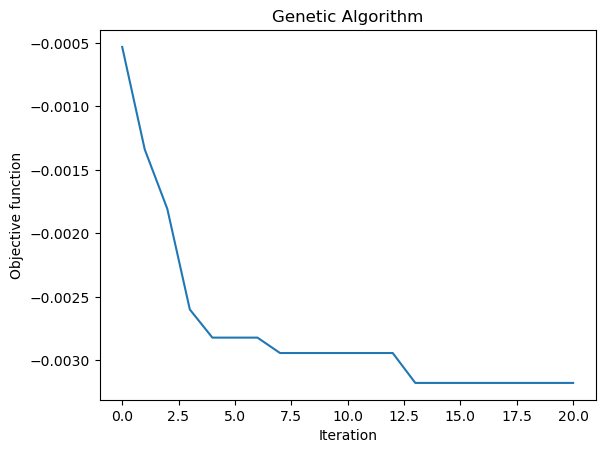

In [154]:
model.run()

In [155]:
Xresh = model.output_dict["variable"].astype(int).reshape(-1,2)

(2726, 2511)


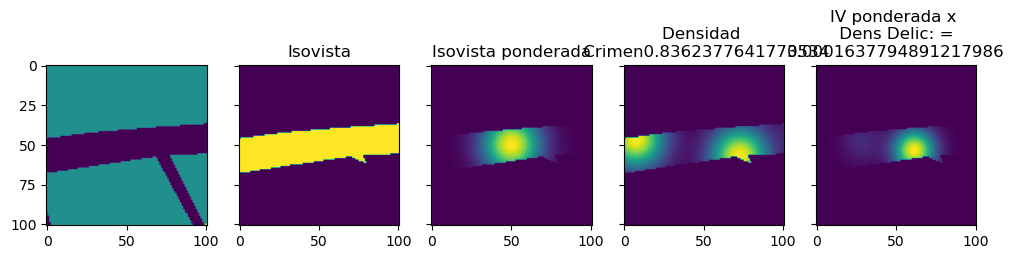

(2246, 3145)


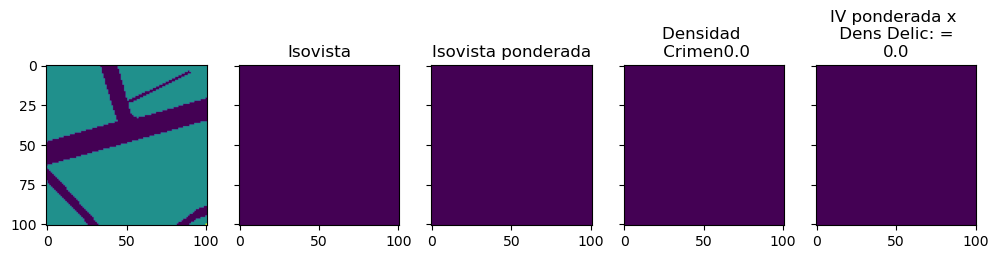

(4043, 1465)


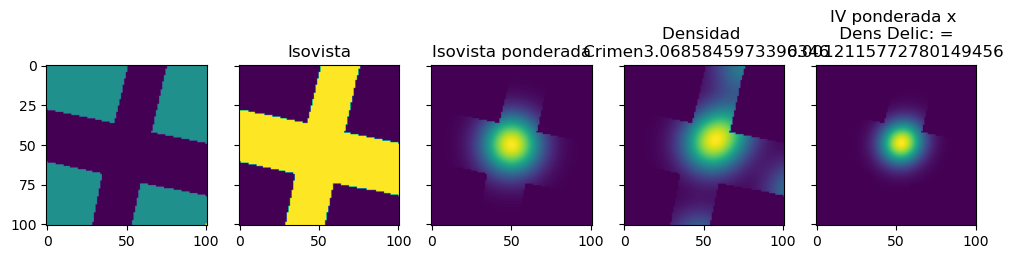

(3978, 4116)


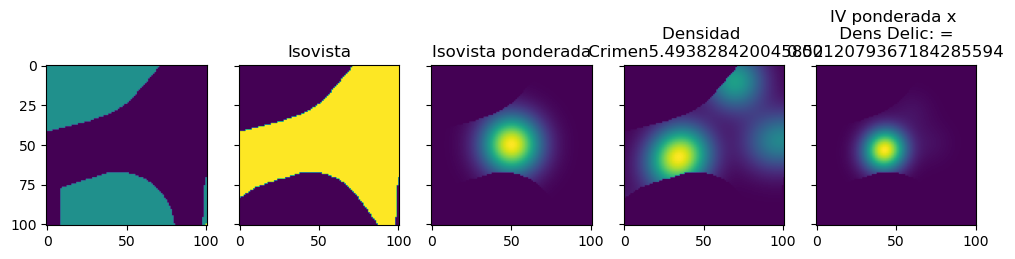

(2063, 2534)


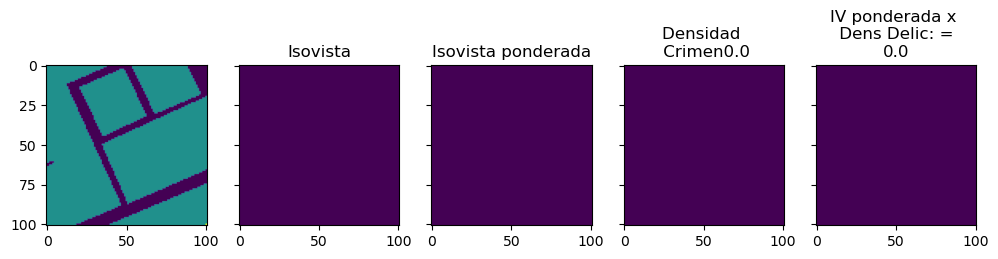

(2836, 4151)


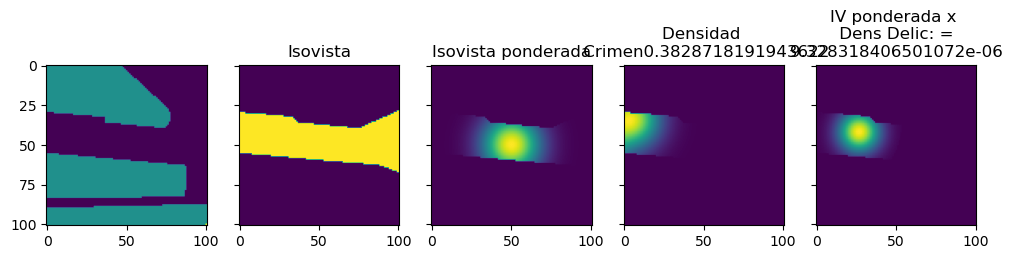

(1147, 1277)


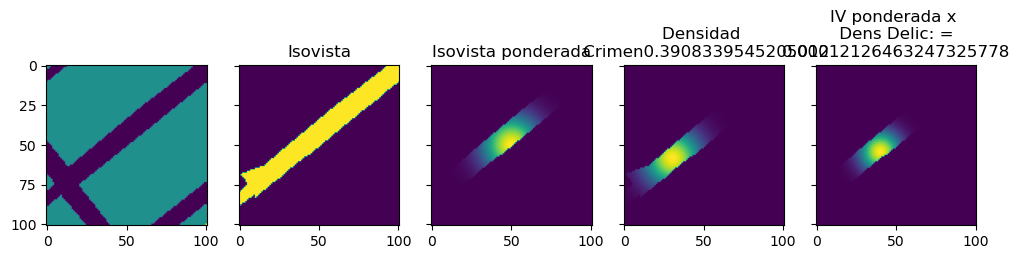

(3977, 1128)


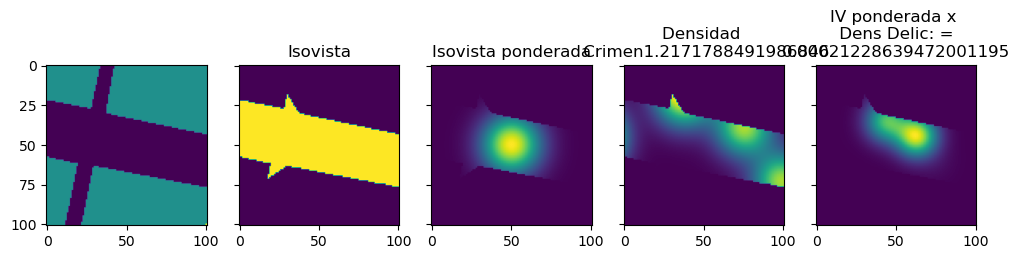

(2269, 3725)


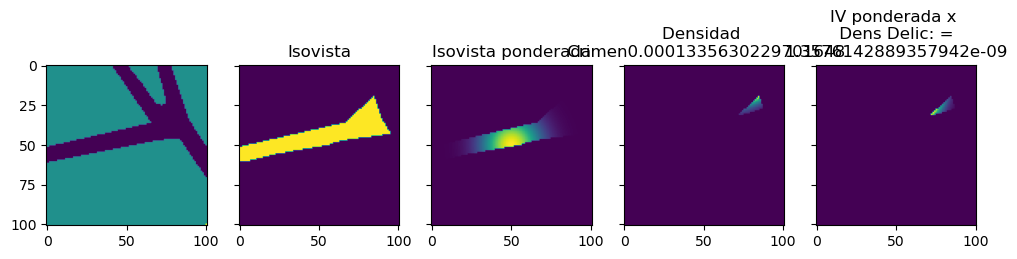

(3360, 4575)


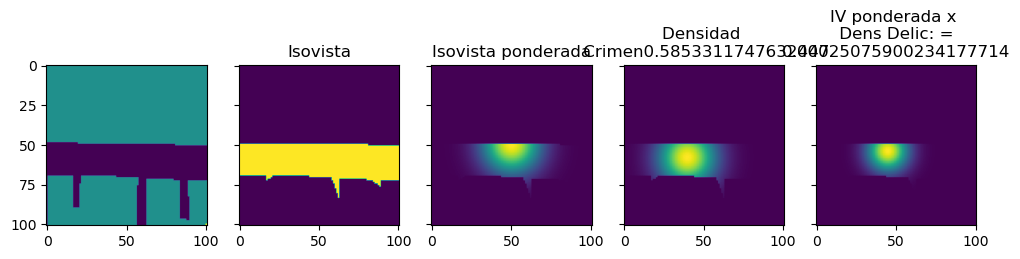

In [159]:
COVERS = np.zeros((n_sensors+1, S.shape[0], S.shape[1]))

for i, x in enumerate(Xresh):
    
    si = tuple(x)
    print(si)
    
    Z = np.zeros((L*2+1, L*2+1))
    Z[(L*2, L*2)] = 1
    
    S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
    mask = aptitude.isovista(S_sub)
    K = aptitude.gkern(101, 4)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)
    axs[0].imshow(S_sub+Z)
    
    axs[1].title.set_text("Isovista")
    axs[1].imshow(mask)
    
    axs[2].title.set_text("Isovista ponderada")
    axs[2].imshow(mask*K)
    
    axs[3].title.set_text("Densidad \n Crimen" + str(np.sum(CD_sub*mask)))
    axs[3].imshow(CD_sub*mask)
    
    axs[4].imshow(CD_sub*K*mask)
    axs[4].title.set_text("IV ponderada x \n Dens Delic: = \n"+str(np.sum(CD_sub*K*mask)).format)
    
    COVERS[i+1, si[0]-L : si[0] + L + 1, si[1]-L:si[1]+L+1] = CD_sub*K*mask

    plt.show()
    
max_covers = np.max(COVERS, axis=0)
    
   
   


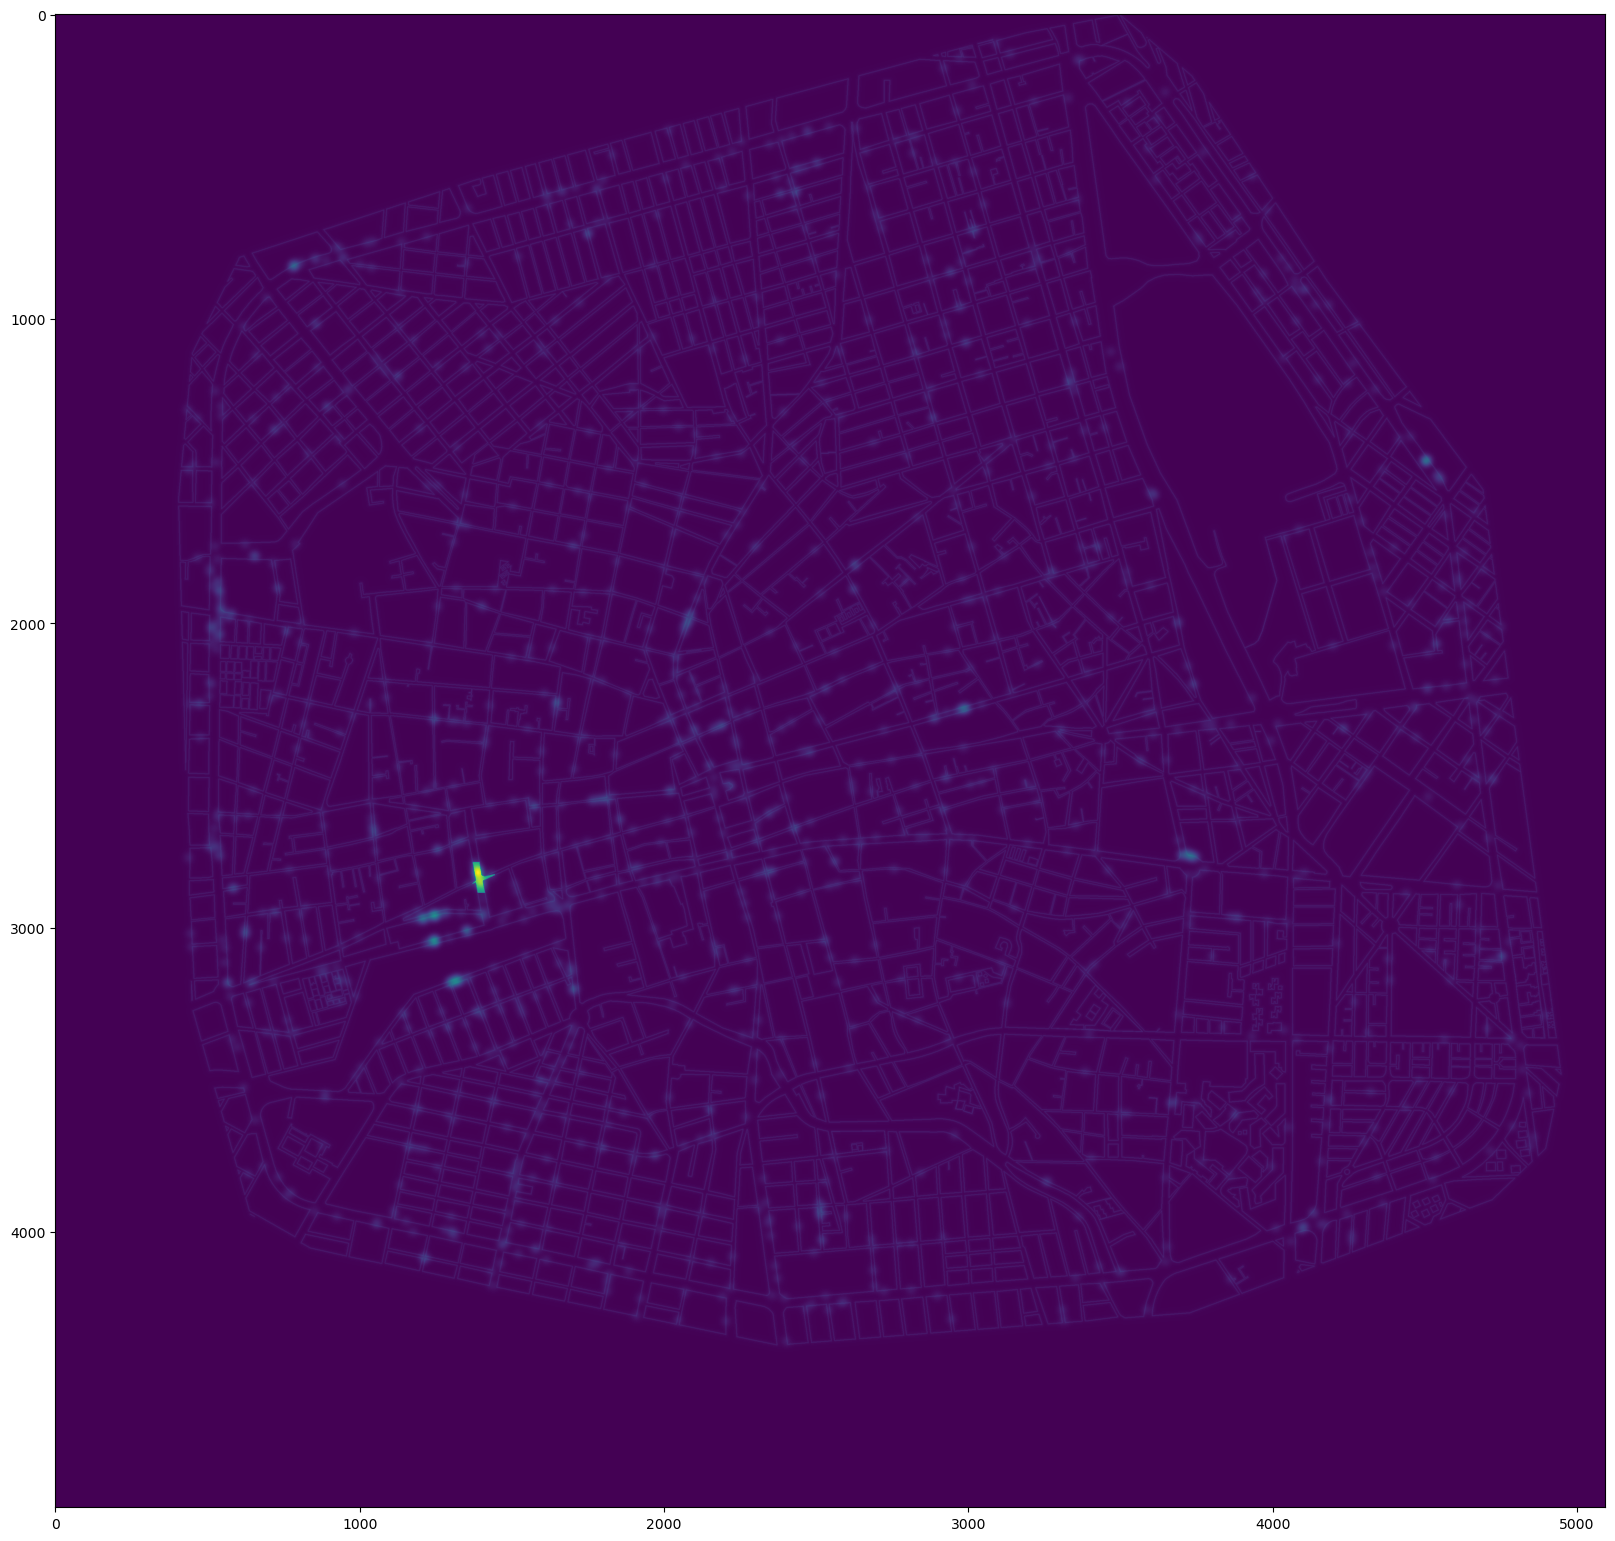

In [104]:
plt.figure(figsize=(20, 20))
plt.imshow(5*(max_covers>0)+W+CD*500)

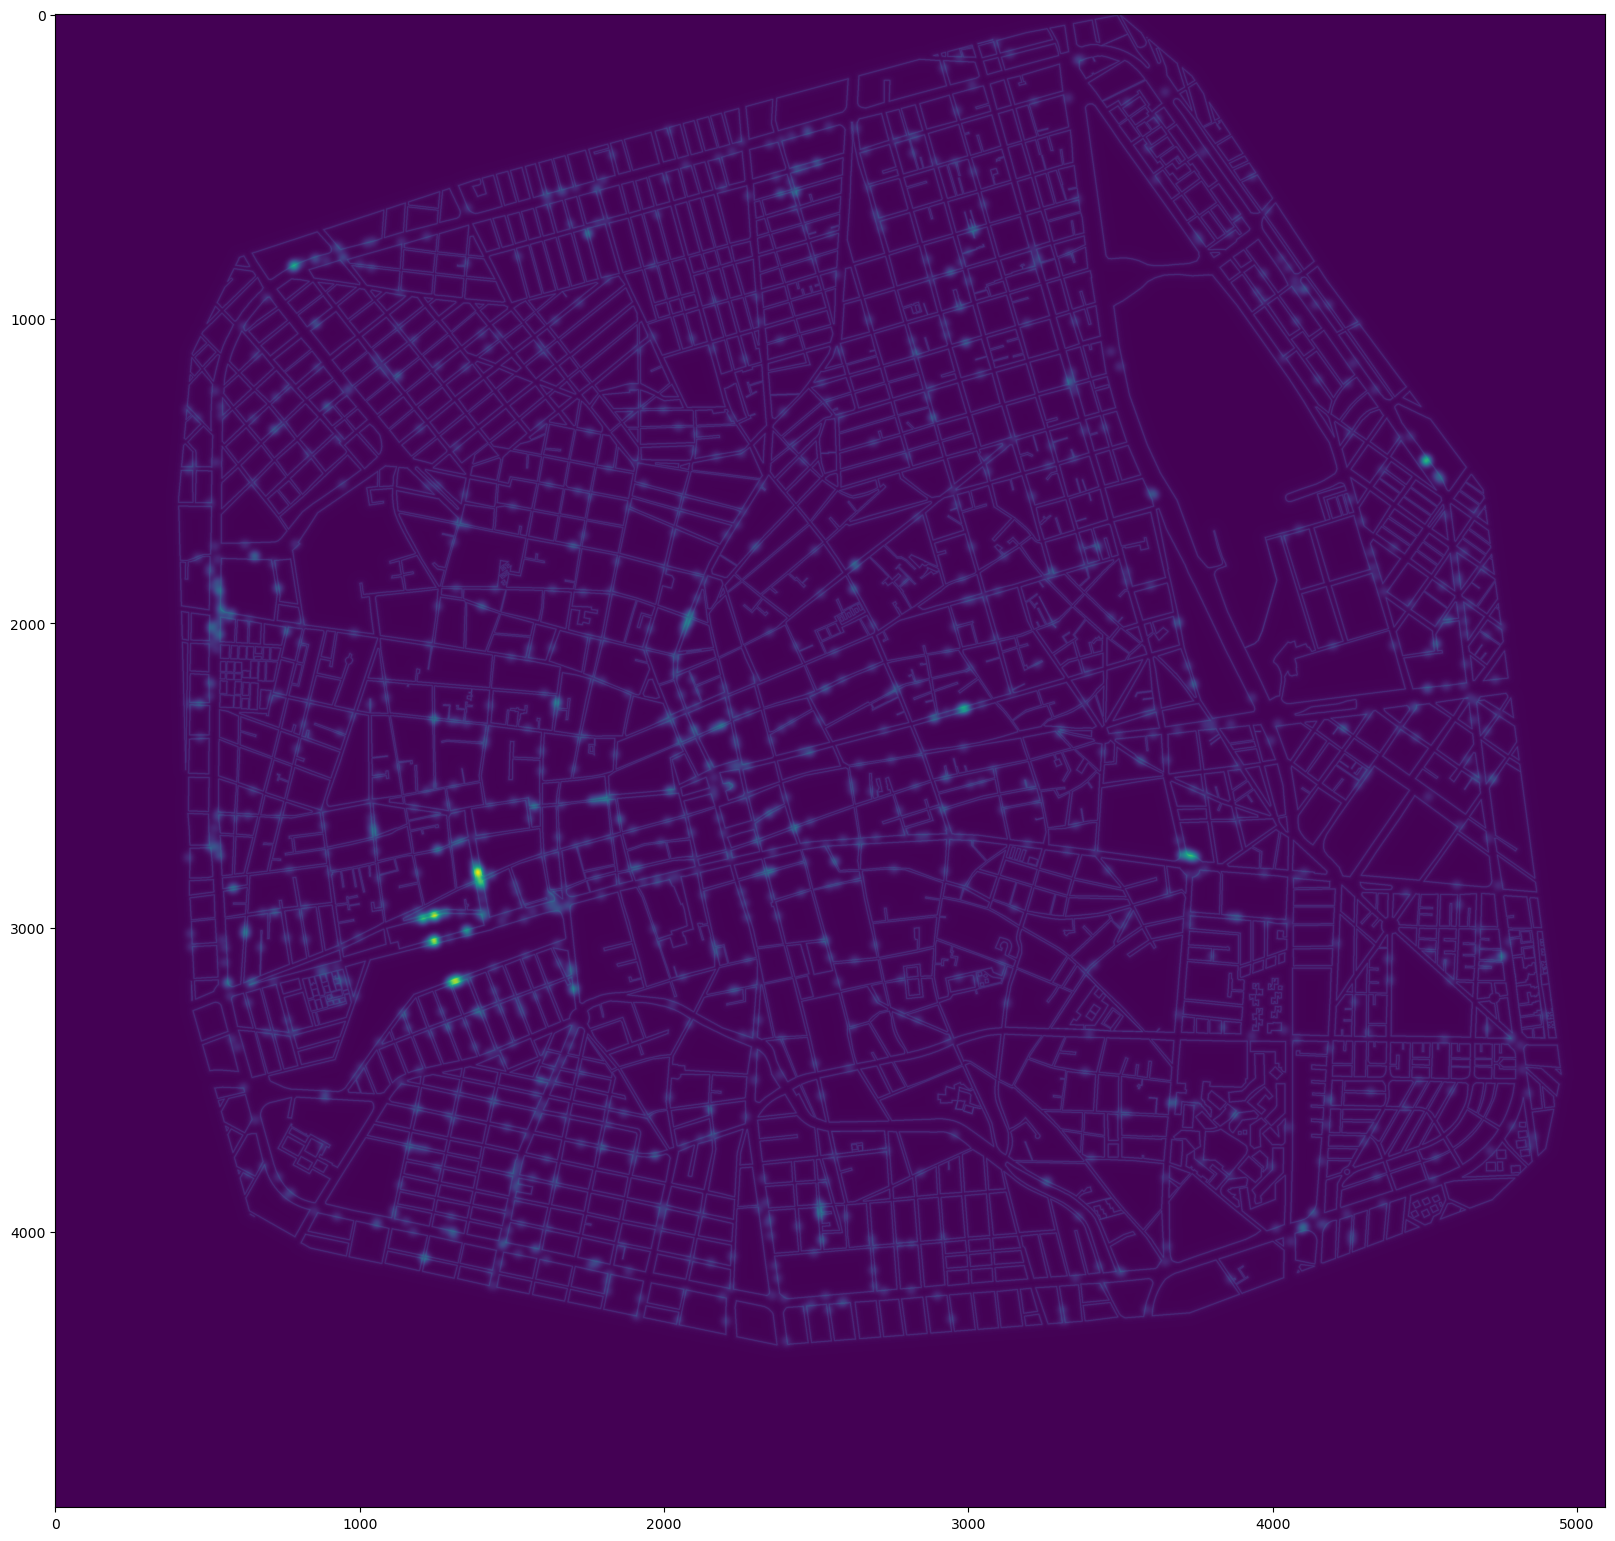

In [161]:
plt.figure(figsize=(20, 20))
plt.imshow(W+CD*500)

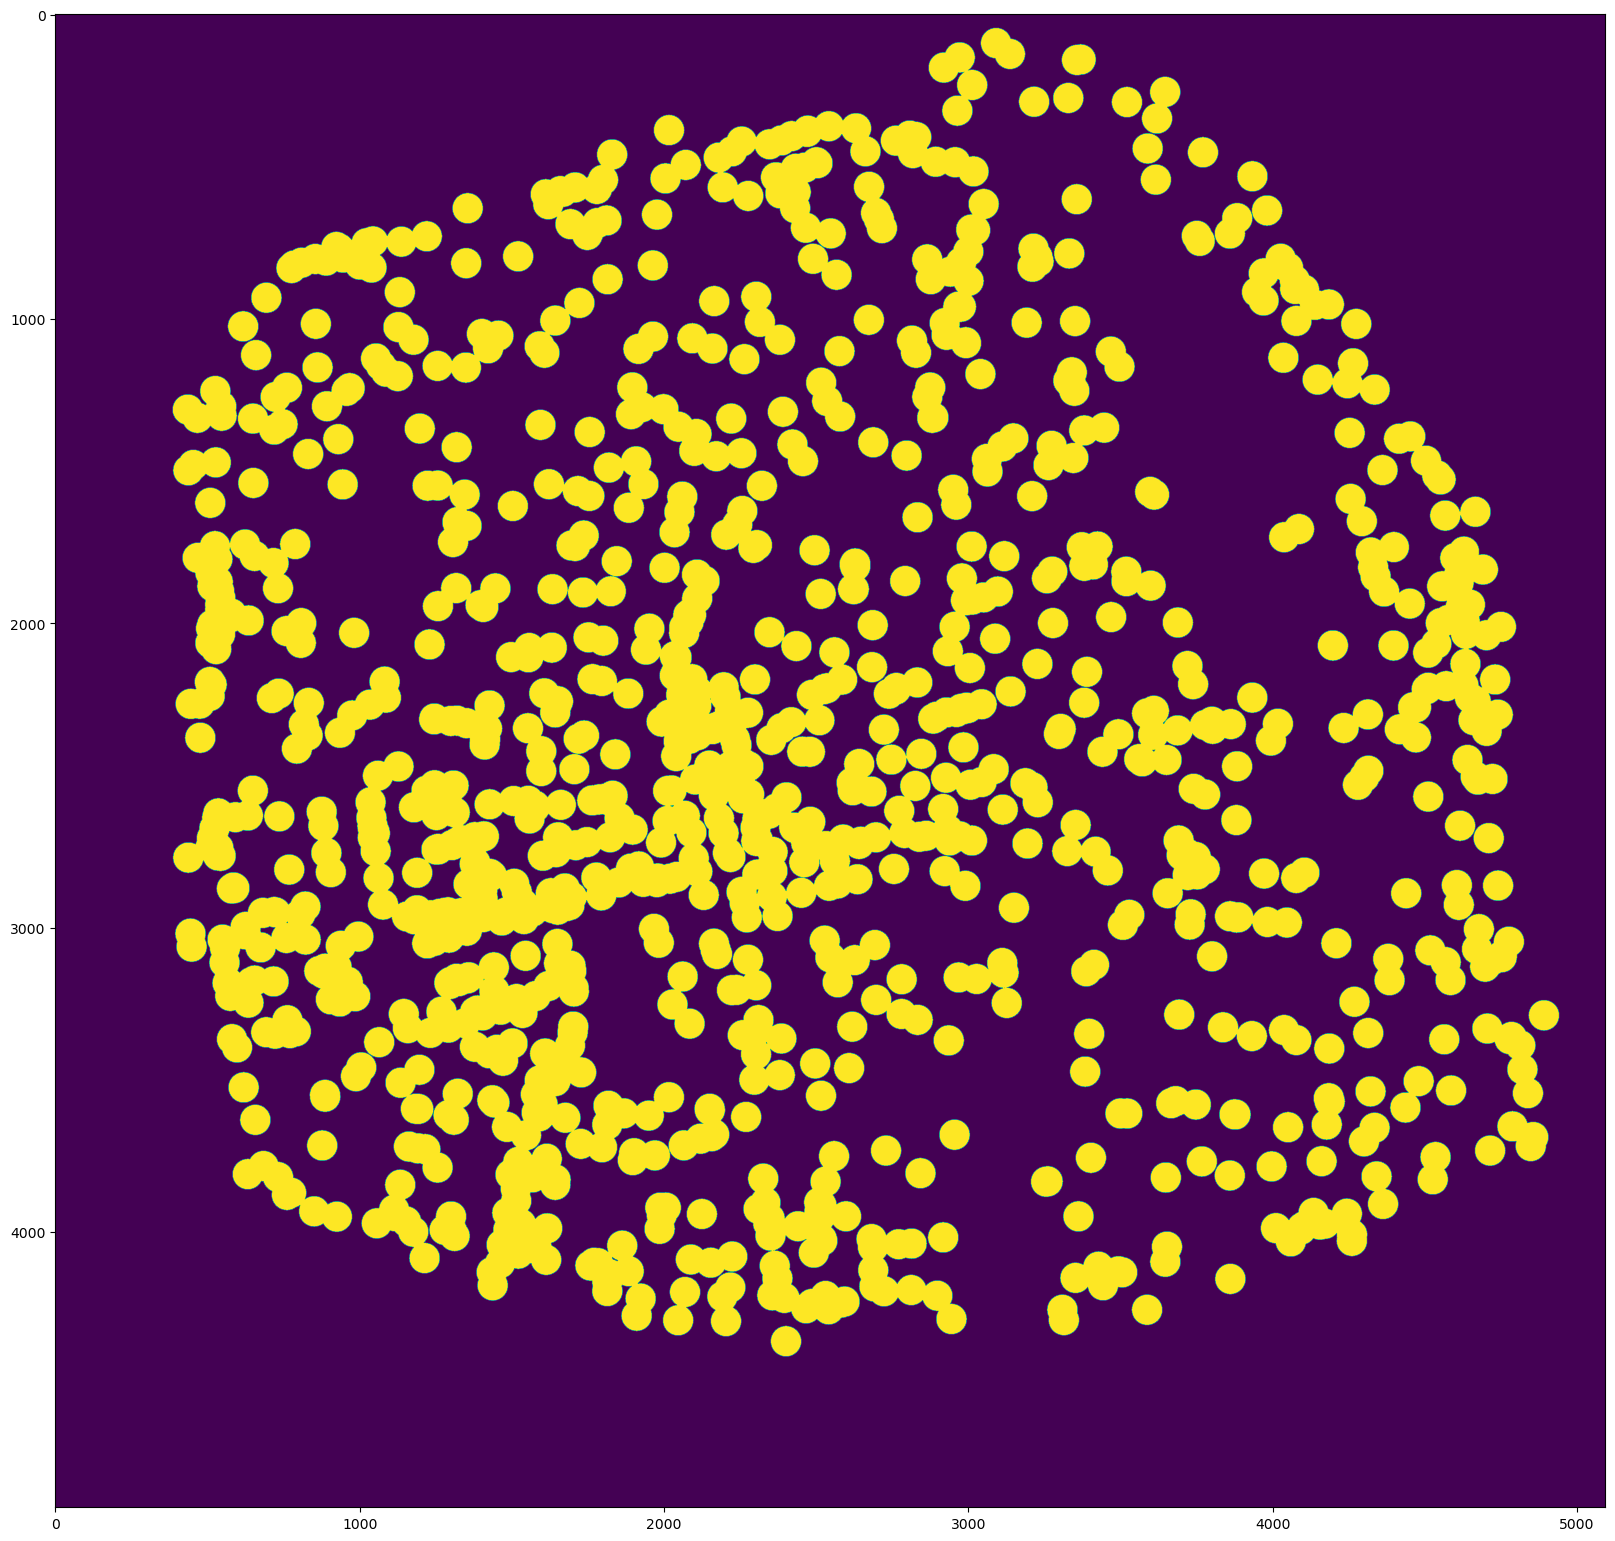

In [162]:
plt.figure(figsize=(20, 20))
plt.imshow((CD>0)*1)
#plt.imshow()

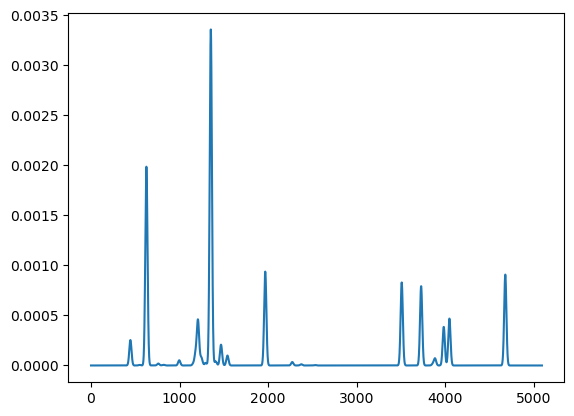

In [200]:

plt.plot(CD[3000,:])

In [202]:
nsig = 2
kernlen = L*2
x = np.linspace(-nsig, nsig, kernlen+1)
kern1d = np.diff(st.norm.cdf(x))

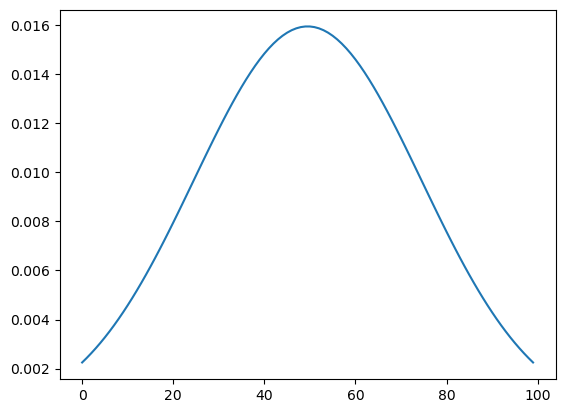

In [203]:
plt.plot(kern1d)

In [198]:
Sm = list([])

for i in np.arange(0, len(CD[3000,:])-L):
    Sm.append(np.sum(kern1d*CD[3000, i:i+L]))

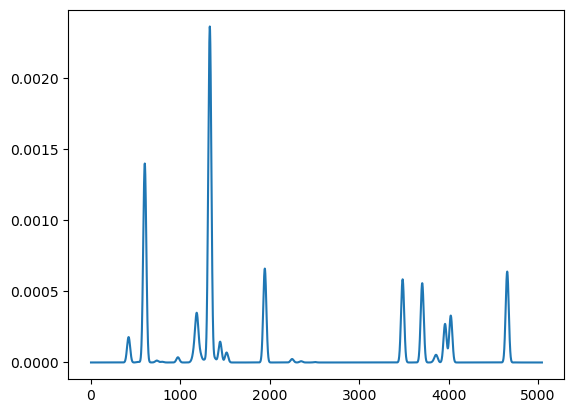

In [199]:
plt.plot(Sm)

In [1]:
plt.plot(CD[3000,:])
plt.plot(Sm)

NameError: name 'plt' is not defined